Step-by-Step Google Colab Lab: Data Preparation and Cleaning
1. Import Necessary Libraries
Start by loading essential libraries for data manipulation and visualization.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")

2. Load a Sample Dataset
We’ll use a sample dataset to demonstrate data cleaning techniques. The dataset contains missing values, duplicates, and inconsistent data.

In [ ]:
# Creating a sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Ella', 'Frank', 'Grace', 'Alice'],
    'Age': [24, 27, 22, None, 29, 24, None, 24],
    'Gender': ['Female', 'Male', 'Male', None, 'Female', 'Male', 'Female', 'Female'],
    'Salary': [50000, 54000, 58000, 62000, None, 45000, None, 50000],
    'Joining Date': ['2021-01-15', '2020-05-20', None, '2019-08-10', '2021-07-01', '2020-12-05', None, '2021-01-15']
}

# Converting to a DataFrame
df = pd.DataFrame(data)

# Displaying the dataset
print("Original Dataset:")
print(df)

3. Identify Missing Values
Check for missing values in the dataset.

In [ ]:
# Checking for missing values
print("\nMissing Values (per column):")
print(df.isnull().sum())

# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualization of Missing Values")
plt.show()

4. Handling Missing Values
Use different techniques to fill or drop missing values.

In [ ]:
# Dropping rows with all missing values
df = df.dropna(how='all')

# Filling missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill with mean for numerical data
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Fill with median for numerical data
df['Gender'].fillna('Unknown', inplace=True)  # Fill with a placeholder for categorical data
df['Joining Date'].fillna('2020-01-01', inplace=True)  # Fill with a default date

print("\nDataset after handling missing values:")
print(df)

5. Handling Duplicates
Check and remove duplicate rows.

In [ ]:
# Checking for duplicate rows
print("\nDuplicate Rows:")
print(df[df.duplicated()])

# Removing duplicate rows
df = df.drop_duplicates()

print("\nDataset after removing duplicates:")
print(df)

6. Handling Inconsistent Data
Standardize inconsistent or incorrect entries.

In [ ]:
# Standardizing Gender column values
df['Gender'] = df['Gender'].str.capitalize()

# Verifying standardized data
print("\nDataset after standardizing Gender column:")
print(df)

7. Converting Data Types
Ensure all columns have appropriate data types.

In [ ]:
# Converting Joining Date to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'])

# Verifying data types
print("\nData Types after conversion:")
print(df.dtypes)

8. Detecting Outliers
Visualize and handle outliers in numerical data.

In [ ]:
# Visualizing outliers in Salary
plt.boxplot(df['Salary'])
plt.title("Boxplot of Salary (Detecting Outliers)")
plt.show()

# Handling outliers by capping values
upper_limit = df['Salary'].mean() + 3 * df['Salary'].std()
lower_limit = df['Salary'].mean() - 3 * df['Salary'].std()

df['Salary'] = np.where(df['Salary'] > upper_limit, upper_limit, df['Salary'])
df['Salary'] = np.where(df['Salary'] < lower_limit, lower_limit, df['Salary'])

print("\nDataset after handling outliers in Salary:")
print(df)

9. Feature Engineering
Add new columns based on existing data.

In [ ]:
# Adding a column for years of experience
df['Years of Experience'] = 2025 - pd.DatetimeIndex(df['Joining Date']).year

print("\nDataset after adding 'Years of Experience':")
print(df)


10. Final Cleaned Dataset
Display the final cleaned and prepared dataset.

In [ ]:
print("\nFinal Cleaned Dataset:")
print(df)

# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")

Descriptive Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset (raw, with issues)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Ella', 'Frank', 'Grace', 'Alice'],
    'Age': [24, 27, None, 35, 29, 24, None, 24],
    'Gender': ['Female', 'Male', 'Male', None, 'Female', 'Male', 'Female', 'Female'],
    'Salary': [50000, 54000, 58000, 62000, None, 45000, None, 50000],
    'Joining Date': ['2021-01-15', '2020-05-20', None, '2019-08-10', '2021-07-01', '2020-12-05', None, '2021-01-15']
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Display the raw dataset
print("Raw Dataset:")
print(df)

# Step 1: Handling Missing Values
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing Age with mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Fill missing Salary with median
df['Gender'].fillna('Unknown', inplace=True)  # Fill missing Gender with "Unknown"
df['Joining Date'].fillna('2020-01-01', inplace=True)  # Fill missing Joining Date with a default date

# Step 2: Removing Duplicates
df.drop_duplicates(inplace=True)

# Step 3: Standardizing Data
df['Gender'] = df['Gender'].str.capitalize()  # Capitalize Gender column

# Step 4: Converting Data Types
df['Joining Date'] = pd.to_datetime(df['Joining Date'])  # Convert Joining Date to datetime

# Step 5: Handling Outliers (Capping Salary values)
upper_limit = df['Salary'].mean() + 3 * df['Salary'].std()
lower_limit = df['Salary'].mean() - 3 * df['Salary'].std()
df['Salary'] = np.where(df['Salary'] > upper_limit, upper_limit, df['Salary'])
df['Salary'] = np.where(df['Salary'] < lower_limit, lower_limit, df['Salary'])

# Step 6: Adding Features
df['Years of Experience'] = 2025 - df['Joining Date'].dt.year  # Add new feature

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df)

Raw Dataset:
      Name   Age  Gender   Salary Joining Date
0    Alice  24.0  Female  50000.0   2021-01-15
1      Bob  27.0    Male  54000.0   2020-05-20
2  Charlie   NaN    Male  58000.0         None
3    David  35.0    None  62000.0   2019-08-10
4     Ella  29.0  Female      NaN   2021-07-01
5    Frank  24.0    Male  45000.0   2020-12-05
6    Grace   NaN  Female      NaN         None
7    Alice  24.0  Female  50000.0   2021-01-15

Cleaned Dataset:
      Name        Age   Gender   Salary Joining Date  Years of Experience
0    Alice  24.000000   Female  50000.0   2021-01-15                    4
1      Bob  27.000000     Male  54000.0   2020-05-20                    5
2  Charlie  27.166667     Male  58000.0   2020-01-01                    5
3    David  35.000000  Unknown  62000.0   2019-08-10                    6
4     Ella  29.000000   Female  52000.0   2021-07-01                    4
5    Frank  24.000000     Male  45000.0   2020-12-05                    5
6    Grace  27.166667   Fema

<ipython-input-1-90a5c23978fa>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing Age with mean
<ipython-input-1-90a5c23978fa>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

2. Descriptive Analysis of Cleaned Data
Once the data is cleaned, descriptive analysis verifies the quality and provides insights into the dataset.
Explanation of Steps
1. Data Cleaning
Missing Values: Missing Age, Salary, and Gender values are filled with meaningful defaults (e.g., mean, median, or placeholder).
Duplicates: Duplicate rows are identified and removed.
Standardization: Ensures categorical data (e.g., Gender) is consistent.
Outliers: Extreme values in Salary are capped to avoid skewing the analysis.
New Features: Adds Years of Experience based on the Joining Date.
2. Descriptive Analysis
Descriptive Statistics: Provides key metrics like mean, median, variance, and standard deviation for numerical data.
Visualizations:
Histogram: Shows the distribution of Age.
Boxplot: Highlights outliers and spread in Salary.
Heatmap: Displays correlations between numerical columns.Filter Numeric Columns: The select_dtypes(include=[np.number]) function selects only numerical columns (like Age, Salary, Years of Experience) from the dataset.
Handle Non-Numeric Data: Non-numeric columns (Name, Gender, etc.) are excluded from the correlation computation.
Check for Empty Data: If there are no numeric columns in the dataset, the code gracefully handles the situation by printing a message instead of attempting to plot an empty heatmap.
Countplot: Shows the distribution of Gender.
Expected Output
Cleaned Dataset
A tabular dataset with no missing values, duplicates removed, and consistent formatting.

Descriptive Analysis
Key Summary Statistics:
Mean, median, and mode for numerical columns.
Variance and standard deviation to understand the spread.
Visual Insights:
Distribution of Age via histogram.
Outliers in Salary via boxplot.
Relationships between numerical columns via a correlation heatmap.
Gender distribution via a countplot.




Descriptive Statistics:
         Name        Age  Gender        Salary                   Joining Date  \
count       7   7.000000       7      7.000000                              7   
unique      7        NaN       3           NaN                            NaN   
top     Alice        NaN  Female           NaN                            NaN   
freq        1        NaN       3           NaN                            NaN   
mean      NaN  27.619048     NaN  53285.714286  2020-06-29 06:51:25.714285824   
min       NaN  24.000000     NaN  45000.000000            2019-08-10 00:00:00   
25%       NaN  25.500000     NaN  51000.000000            2020-01-01 00:00:00   
50%       NaN  27.166667     NaN  52000.000000            2020-05-20 00:00:00   
75%       NaN  28.083333     NaN  56000.000000            2020-12-25 12:00:00   
max       NaN  35.000000     NaN  62000.000000            2021-07-01 00:00:00   
std       NaN   3.727667     NaN   5498.917642                            NaN   

  

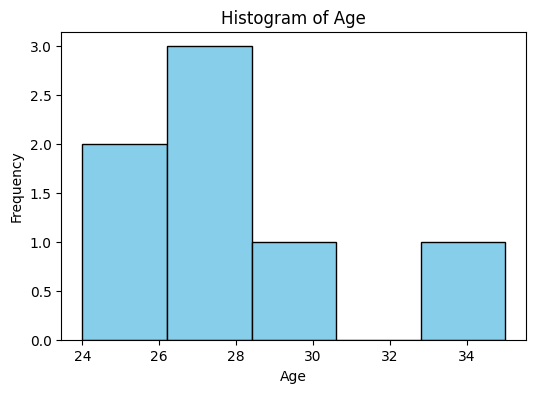

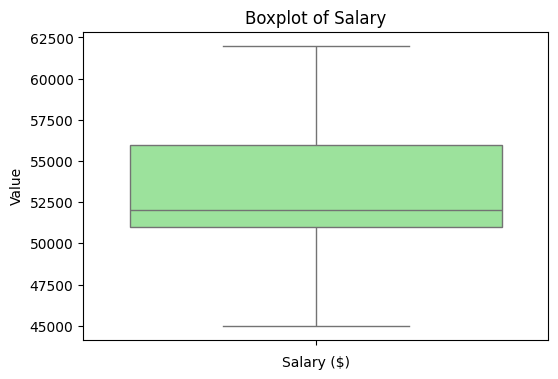

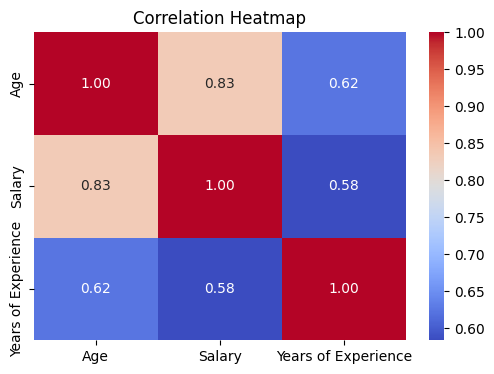

<ipython-input-3-fff60c9eb2e2>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


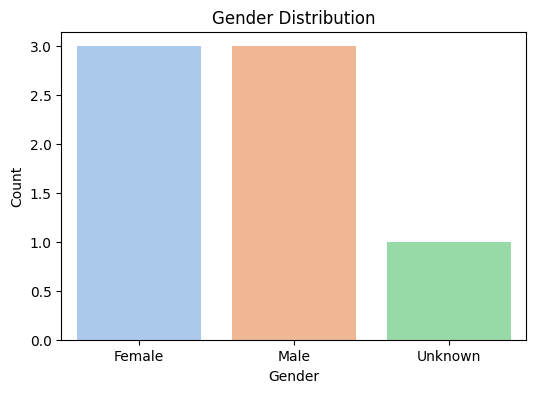

In [3]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))  # Include all columns

# Individual Descriptive Metrics
print("\nAdditional Descriptive Metrics:")
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Salary: {df['Salary'].median():.2f}")
print(f"Mode of Gender: {df['Gender'].mode()[0]}")
print(f"Variance in Age: {df['Age'].var():.2f}")
print(f"Standard Deviation of Salary: {df['Salary'].std():.2f}")

# Visualizing Cleaned Data
print("\nGenerating Visualizations...")

# Histogram of Age
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Salary
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Salary'], color='lightgreen')
plt.title('Boxplot of Salary')
plt.xlabel('Salary ($)')
plt.ylabel('Value')
plt.show()

# Correlation Heatmap
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Check if there are any numeric columns
if not numeric_df.empty:
    # Correlation Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

# Countplot for Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()